In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import os

In [2]:
original_dataset_dir = r"C:\Users\psamt\OneDrive - The University of Nottingham\_Spring\PHYS4036_Machine Learning in Science Part II\Project\Dataset\original\training_data\training_data"
original_label_csv = r"C:\Users\psamt\OneDrive - The University of Nottingham\_Spring\PHYS4036_Machine Learning in Science Part II\Project\Dataset\original\training_norm.csv"

cleaned_dataset_dir = r"C:\Users\psamt\OneDrive - The University of Nottingham\_Spring\PHYS4036_Machine Learning in Science Part II\Project\Dataset\machine-learning-in-science-ii-2025\training_data\training_data"
cleaned_label_csv = r"C:\Users\psamt\OneDrive - The University of Nottingham\_Spring\PHYS4036_Machine Learning in Science Part II\Project\Dataset\machine-learning-in-science-ii-2025\training_norm_cleaned_7.csv"

In [3]:
original_csv = pd.read_csv(original_label_csv).set_index("image_id")
cleaned_csv = pd.read_csv(cleaned_label_csv).set_index("image_id")

In [4]:
original_index = list(original_csv.index)
cleaned_index = list(cleaned_csv.index)

show_index = []

for i in original_index:
    if i in cleaned_index:
        if original_csv.loc[i, "speed"] != cleaned_csv.loc[i, "speed"]:
            if original_csv.loc[i, "speed"] == 1:
                continue
            show_index.append(i)


In [5]:
# fig, ax = plt.subplots(8, 8, figsize=(15, 15))

# ax = ax.ravel()

# for i in range(len(ax)):
#     path = os.path.join(original_dataset_dir, f"{show_index[i]}.png")
#     ax[i].imshow(plt.imread(path))
#     ax[i].set_title(show_index[i])
#     ax[i].axis("off")


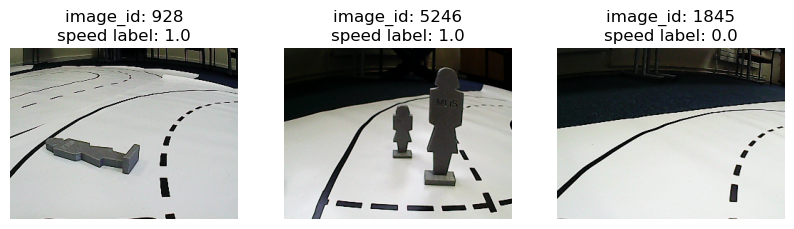

In [6]:
index_list = [928, 5246, 1845]

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax = ax.ravel()

for i in range(len(ax)):
    path = os.path.join(original_dataset_dir, f"{index_list[i]}.png")
    ax[i].imshow(plt.imread(path))
    ax[i].set_title(f"image_id: {index_list[i]}\nspeed label: {original_csv.loc[index_list[i], 'speed']}")
    ax[i].axis("off")

fig.savefig("figures/inaccurate_label.pdf", bbox_inches='tight', pad_inches=0)


In [9]:
csv_df = pd.DataFrame(cleaned_csv)

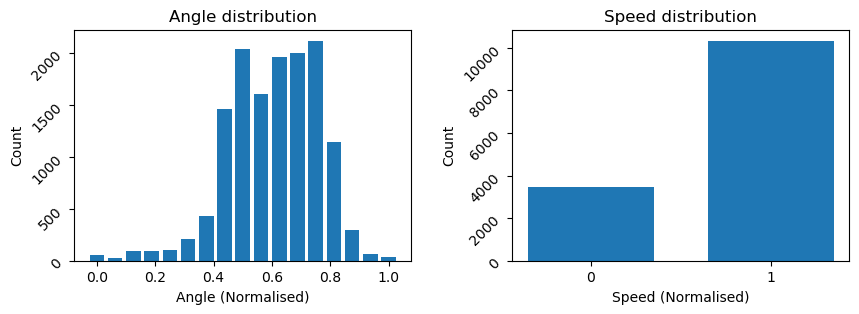

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

angle = csv_df["angle"]

df = pd.DataFrame(angle)
bins = np.unique(angle)
c = df["angle"].value_counts()

angle_count = {}

for bin in bins:
    angle_count[bin] = c[bin]

key, value = list(angle_count.keys()), list(angle_count.values())

ax[0].bar(key, value, width=0.05)
ax[0].set_title("Angle distribution")
ax[0].set_xlabel("Angle (Normalised)")
ax[0].set_ylabel("Count")
ax[0].tick_params(axis='y', rotation=45)


speed = csv_df["speed"]

df = pd.DataFrame(speed)
bins = np.unique(speed)
c = df["speed"].value_counts()

speed_count = {}

for bin in bins:
    speed_count[bin] = c[bin]

key, value = list(speed_count.keys()), list(speed_count.values())

ax[1].bar(key, value, width=0.7)
ax[1].set_title("Speed distribution")
ax[1].set_xlabel("Speed (Normalised)")
ax[1].set_ylabel("Count")
ax[1].tick_params(axis='y', rotation=45)
ax[1].set_xticks(key)

plt.subplots_adjust(wspace=0.3)

plt.savefig("figures/angle_speed_distribution.pdf", bbox_inches='tight', pad_inches=0)

In [33]:
value[0]/(sum(value))

0.25081574940178375

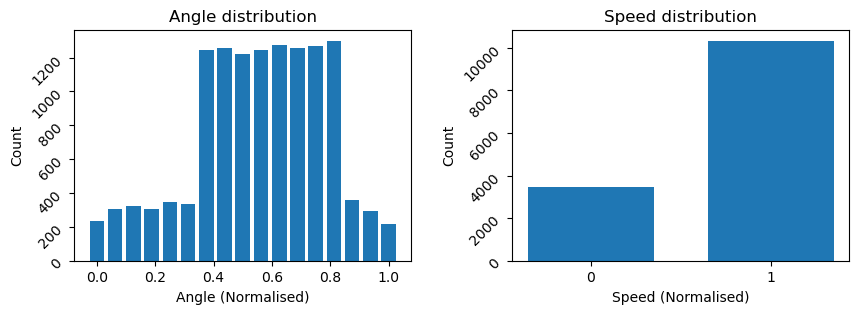

In [39]:
balanced_angle_count = {
    0.0: 237,
    0.0625: 306,
    0.125: 326,
    0.1875: 305,
    0.25: 348,
    0.3125: 336,
    0.375: 1248,
    0.4375: 1255,
    0.5: 1223,
    0.5625: 1246,
    0.625: 1272,
    0.6875: 1255,
    0.75: 1270,
    0.8125: 1300,
    0.875: 361,
    0.9375: 293,
    1.0: 219,
}

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

key = list(balanced_angle_count.keys())
value = list(balanced_angle_count.values())

ax[0].bar(key, value, width=0.05)
ax[0].set_title("Angle distribution")
ax[0].set_xlabel("Angle (Normalised)")
ax[0].set_ylabel("Count")
ax[0].tick_params(axis='y', rotation=45)

speed = csv_df["speed"]

df = pd.DataFrame(speed)
bins = np.unique(speed)
c = df["speed"].value_counts()

speed_count = {}

for bin in bins:
    speed_count[bin] = c[bin]

key, value = list(speed_count.keys()), list(speed_count.values())

ax[1].bar(key, value, width=0.7)
ax[1].set_title("Speed distribution")
ax[1].set_xlabel("Speed (Normalised)")
ax[1].set_ylabel("Count")
ax[1].tick_params(axis='y', rotation=45)
ax[1].set_xticks(key)

plt.subplots_adjust(wspace=0.3)

plt.savefig("figures/angle_speed_distribution_balanced.pdf", bbox_inches='tight', pad_inches=0)

### Augmentation: Copy the following code to either _angle_model.ipynb or _speed_model.ipynb

In [ ]:
# fig, ax = plt.subplots(1, 4, figsize=(12, 3))
# ax = ax.ravel()

# ax[0].set_title("Original image")
# ax[0].imshow(original.numpy().astype("float32"))

# for i in range(3):
#     ax[i+1].set_title("Augmented image")
#     ax[i+1].imshow(images[i].numpy().astype("float32"))

# plt.savefig("Submission/Report/figures/augmentation.pdf", bbox_inches='tight', pad_inches=0)